In [1]:
import numpy as np
import pandas as pd
import csv
import tensorflow as tf
from matplotlib import pyplot as plt

## Part Be

Importing data

In [2]:
data_train=pd.read_csv('sign_mnist_train.csv')
data_test=pd.read_csv('sign_mnist_test.csv')

In [3]:
training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)


print('Shape of Training Images: ', training_images.shape)
print('Shape of Testing Labels:', training_labels.shape)
print('Shape of Testing Images:', testing_images.shape)
print('Shape of Testing Labels:', testing_labels.shape)

Shape of Training Images:  (27455, 28, 28, 1)
Shape of Testing Labels: (27455,)
Shape of Testing Images: (7172, 28, 28, 1)
Shape of Testing Labels: (7172,)


## Part Pe

In [85]:
labels = []
for x in training_labels:
    if x in labels:
        continue
    else:
        labels.append(x)
        
labels.sort()
print(labels)
number_of_samples = np.zeros(len(labels)+1)

for x in training_labels:
    number_of_samples[x] = number_of_samples[x] + 1

print(number_of_samples)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[1126. 1010. 1144. 1196.  957. 1204. 1090. 1013. 1162.    0. 1114. 1241.
 1055. 1151. 1196. 1088. 1279. 1294. 1199. 1186. 1161. 1082. 1225. 1164.
 1118.]


## Part Te

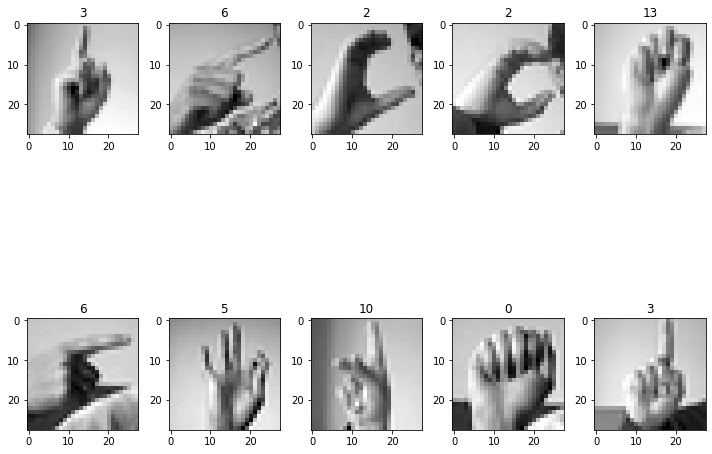

In [5]:
# Plotting the first 10 images 
fig, ax = plt.subplots(2,5) 
fig.set_size_inches(10, 10)
k = 0
for j in range(5):
    ax[0,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
    ax[0,j].set_title(training_labels[k])
    ax[1,j].imshow(testing_images[k].reshape(28, 28) , cmap = "gray")
    ax[1,j].set_title(testing_labels[k])
    k += 1
plt.tight_layout()

## Part Se

In [61]:
Percent = 0.75


X_train = training_images[0:int(Percent*training_images.shape[0])] 
y_train = training_labels[0:int(Percent*training_images.shape[0])]

X_val = training_images[int(Percent*training_images.shape[0]):] 
y_val = training_labels[int(Percent*training_images.shape[0]):]

X_train = X_train/255
X_val = X_val/255
testing_images = testing_images/255
print('Shape of Training Images: ', X_train.shape)
print('Shape of Training Labels:', y_train.shape)
print('Shape of Validation Images:', X_val.shape)
print('Shape of Validation Labels:', y_val.shape)

Shape of Training Images:  (20591, 28, 28, 1)
Shape of Training Labels: (20591,)
Shape of Validation Images: (6864, 28, 28, 1)
Shape of Validation Labels: (6864,)


## Part Jim

In [7]:
one_hot_dict = {}
for i in range(len(labels)):
    label_sample = np.zeros(len(labels))
    label_sample[i] = 1
    one_hot_dict[labels[i]] = label_sample

y_train_one_hot = np.zeros((len(y_train), len(labels)))
y_val_one_hot = np.zeros((len(y_val), len(labels)))  
testing_labels_one_hot = np.zeros((len(testing_labels), len(labels)))

for i in range(len(y_train)):
    y_train_one_hot[i,:] = one_hot_dict[y_train[i]]

for i in range(len(y_val)):
    y_val_one_hot[i,:] = one_hot_dict[y_val[i]]
    
for i in range(len(testing_labels)):
    testing_labels_one_hot[i,:] = one_hot_dict[testing_labels[i]]
    
    
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)
print(testing_labels_one_hot.shape)

(20591, 24)
(6864, 24)
(7172, 24)


## Part Che and He

In [53]:
import os
import itertools
import numpy as np
import scipy.io
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization,Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad ,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input

from __future__ import absolute_import
from __future__ import print_function
batch_size = 128
nb_classes = 24
nb_epoch = 10

model = Sequential()

# first Convoloution Layer
model.add(Convolution2D(filters = 128, kernel_size = 3, padding="same", input_shape=(28, 28, 1)))
model.add(keras.layers.LeakyReLU(alpha=0.3))
model.add(BatchNormalization())

# second Convoloution Layer
model.add(Convolution2D(filters = 64,kernel_size = 3 , padding="same"))
model.add(keras.layers.LeakyReLU(alpha=0.3))
model.add(BatchNormalization())

# maxPooling
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.25))

# third Convoloution Layer
model.add(Convolution2D(filters = 64,kernel_size = 3, padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# fourth Convoloution Layer
model.add(Convolution2D(filters = 64, kernel_size = 3, padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# maxPooling
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.25))

# fifth Convoloution Layer
model.add(Convolution2D(filters = 64,kernel_size = 3, padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# sixth Convoloution Layer
model.add(Convolution2D(filters = 64,kernel_size = 3, padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())


# Flattening -> Since it is a one dimensional Vector.
model.add(Flatten())
model.add(BatchNormalization())

# Using DropOut with arbitrary percent
# in Order to prevent Overfitting Ocurance.

# final fully connected layers
# Enhance performance with BatchNormalization
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))



adam=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
adammax = keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))



# training and validation
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=10, verbose=1, validation_data=(X_val, y_val_one_hot))




Epoch 1/10
161/161 [==============================] - 189s 1s/step - loss: 0.6623 - accuracy: 0.8121 - val_loss: 3.2215 - val_accuracy: 0.1467
Epoch 2/10
161/161 [==============================] - 203s 1s/step - loss: 0.0376 - accuracy: 0.9912 - val_loss: 2.8055 - val_accuracy: 0.2254
Epoch 3/10
161/161 [==============================] - 205s 1s/step - loss: 0.0130 - accuracy: 0.9980 - val_loss: 0.2543 - val_accuracy: 0.9184
Epoch 4/10
161/161 [==============================] - 205s 1s/step - loss: 0.0071 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9997
Epoch 5/10
161/161 [==============================] - 206s 1s/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 1.5533e-04 - val_accuracy: 1.0000
Epoch 6/10
161/161 [==============================] - 206s 1s/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 3.0936e-05 - val_accuracy: 1.0000
Epoch 7/10
161/161 [==============================] - 207s 1s/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 6.1653e-04 - val_accu

## Part Khe

### Plotting Model Accuracy for Train and Validation Data

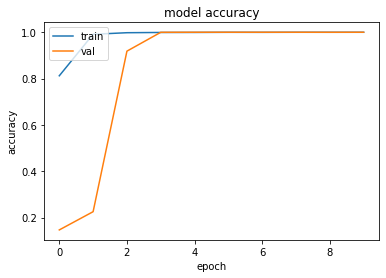

In [60]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plotting Model Loss for Train and Validation Data

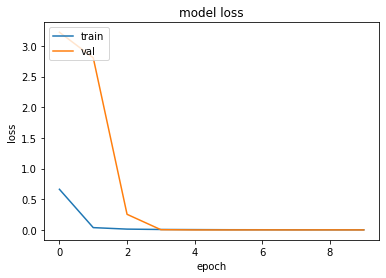

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Part Dal

In [145]:
# Evaluation Accurancy on Train Data
score_train = model.evaluate(X_train, y_train_one_hot, verbose=0)
print('loss:', score_train[0])
print('accuracy:', score_train[1])

loss: 1.9236655134591274e-05
accuracy: 1.0


In [146]:
# Evaluation Accurancy on Validation Data
score_val = model.evaluate(X_val, y_val_one_hot, verbose=0)
print('loss:', score_val[0])
print('accuracy:', score_val[1])

loss: 1.9884491848642938e-05
accuracy: 1.0


In [144]:
# Evaluation Accurancy on Test Data
score = model.evaluate(testing_images, testing_labels_one_hot, verbose=0)
print('loss:', score[0])
print('accuracy:', score[1])

loss: 0.16755254566669464
accuracy: 0.9553820490837097


In [143]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_hat_train = model.predict(X_train)
y_pred_train = np.argmax(y_hat_train, axis=1)

y_pred_final_train = np.zeros(y_pred_train.shape)
for i in range(len(y_pred_train)):
    y_pred_final_train[i] = labels[y_pred_train[i]]
    
cm_train = confusion_matrix(y_train,y_pred_final_train)

Confusion matrix, without normalization


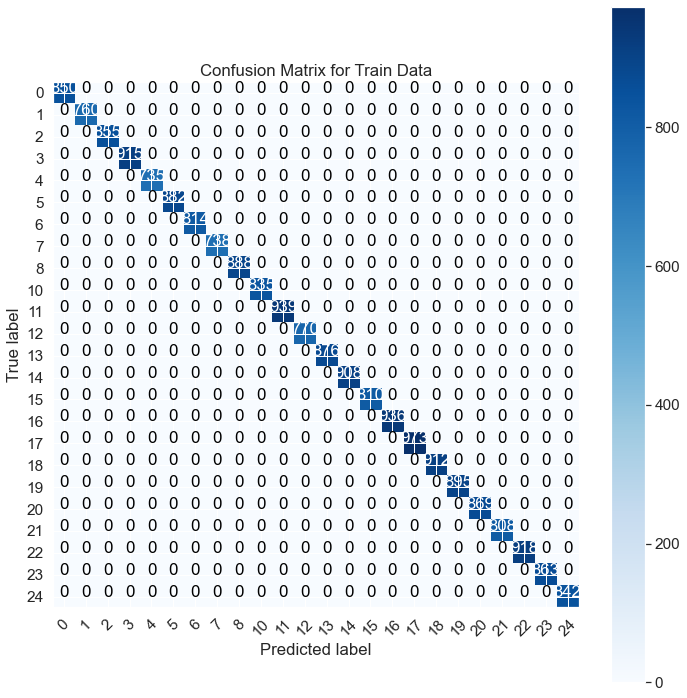

In [142]:
cm_plot_labels = labels
plot_confusion_matrix(cm=cm_train, classes=cm_plot_labels, title='Confusion Matrix for Train Data')

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_hat_val = model.predict(X_val)
y_pred_val = np.argmax(y_hat_val, axis=1)

y_pred_final_val = np.zeros(y_pred_val.shape)
for i in range(len(y_pred_val)):
    y_pred_final_val[i] = labels[y_pred_val[i]]
    
cm_val = confusion_matrix(y_val,y_pred_final_val)


Confusion matrix, without normalization


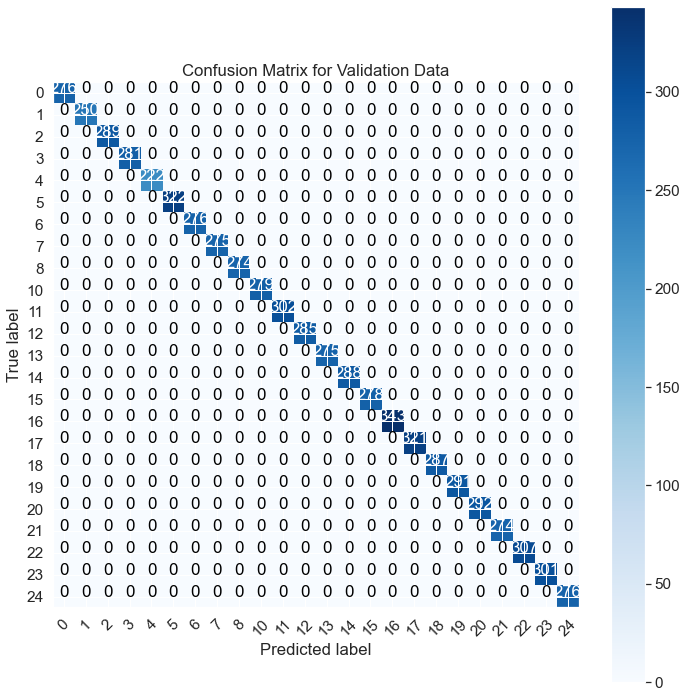

In [137]:
cm_plot_labels = labels
plot_confusion_matrix(cm=cm_val, classes=cm_plot_labels, title='Confusion Matrix for Validation Data')

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_hat_test = model.predict(testing_images)
y_pred_test = np.argmax(y_hat_test, axis=1)

y_pred_final_test = np.zeros(y_pred_test.shape)
for i in range(len(y_pred_val)):
    y_pred_final_test[i] = labels[y_pred_test[i]]
    
cm_test = confusion_matrix(testing_labels,y_pred_final_test)


Confusion matrix, without normalization


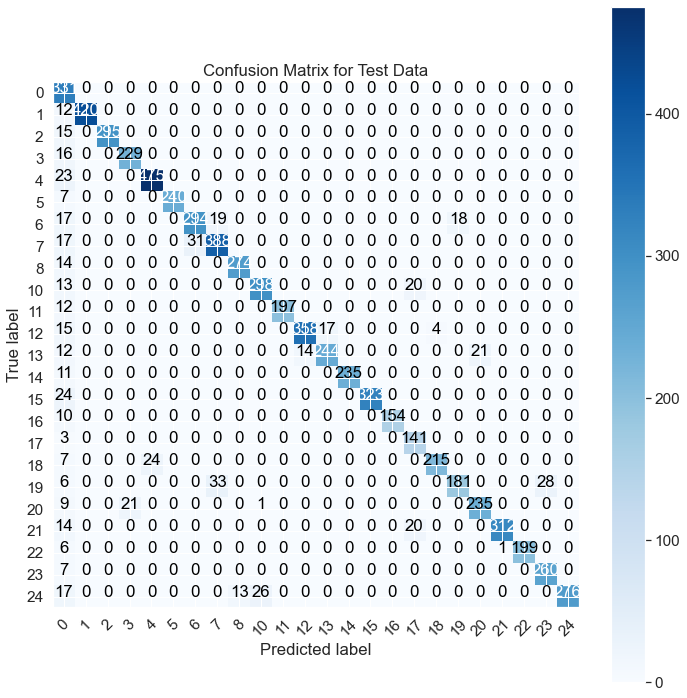

In [140]:
cm_plot_labels = labels
plot_confusion_matrix(cm=cm_test, classes=cm_plot_labels, title='Confusion Matrix for Test Data')

## Part Ze

(3, 3, 1, 128)


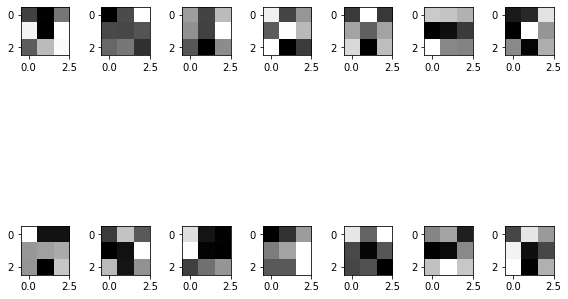

In [80]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()

# get min and max filters ...
# normalize filter values to 0-1 by 
# division by (f_max - f_min) 
# so we can visualize them
f_min, f_max = filters.min(), filters.max()
# normalizing...
filters = (filters - f_min) / (f_max - f_min)

# plot first some filters

print(filters.shape)

fig, ax = plt.subplots(2,7) 
fig.set_size_inches(8, 8)
k = 0

for i in range(2):
    for j in range(7):
        f = filters[:, :, :, k]
        ax[i,j].imshow(f, cmap='gray')
        k += 1
plt.tight_layout()



